# Problem 1 - Wholesale Customers Analysis
## A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).



In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
import scipy.stats as stats
import statsmodels.stats.api as sm

In [45]:
import dataframe_image as dfi

In [46]:
df = pd.read_csv('/Users/siddhantraj/Desktop/Business Analytics/Statistics for Data Science/Final Project/Wholesale+Customers+Data.csv')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [48]:
sample_data = df.head(10)
sample_data

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
5,6,Retail,Other,9413,8259,5126,666,1795,1451
6,7,Retail,Other,12126,3199,6975,480,3140,545
7,8,Retail,Other,7579,4956,9426,1669,3321,2566
8,9,Hotel,Other,5963,3648,6192,425,1716,750
9,10,Retail,Other,6006,11093,18881,1159,7425,2098


In [49]:
dfi.export(sample_data,'sample_data.png')

In [50]:
df.tail(10)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
430,431,Hotel,Other,3097,4230,16483,575,241,2080
431,432,Hotel,Other,8533,5506,5160,13486,1377,1498
432,433,Hotel,Other,21117,1162,4754,269,1328,395
433,434,Hotel,Other,1982,3218,1493,1541,356,1449
434,435,Hotel,Other,16731,3922,7994,688,2371,838
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


In [51]:
sample_dtypes = df.dtypes
sample_dtypes

Buyer/Spender        int64
Channel             object
Region              object
Fresh                int64
Milk                 int64
Grocery              int64
Frozen               int64
Detergents_Paper     int64
Delicatessen         int64
dtype: object

## 1.1

In [52]:
sample_describe = df.describe()
sample_describe

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [53]:
dfi.export(sample_describe,'sample_describe.png')

In [54]:
print('Total number of Variables in the data set -->',df.columns.nunique())
print('The varibles are as follows -->',[i for i in df.columns.unique()])
print('Total number of Categorical Variables in the data set -->',2)
print('The Categorical Variables are as follows -->',['Region','Channel'])

print('Following is the Mean, Median and Mode for all variables :')
print(f"Fresh --->\nMean = {df['Fresh'].mean()}, Median = {df['Fresh'].median()}")
print(f"On calculating Mode for column 'Fresh', we find that the column has more than one Mode i.e.:Mode={df['Fresh'].mode().tolist()}.\nTherefore mode can't be used a measure of central tendency")

print(f"Milk --->\nMean = {df['Milk'].mean()}, Median = {df['Milk'].median()}")
print(f"On calculating Mode for column 'Milk', we find that the column has more than one Mode i.e.:Mode={df['Milk'].mode().tolist()}.\nTherefore mode can't be used a measure of central tendency")
print(f"Grocery --->\nMean = {df['Grocery'].mean()}, Median = {df['Grocery'].median()}")
print(f"On calculating Mode for column 'Grocery', we find that the column has more than one Mode i.e.:Mode={df['Grocery'].mode().tolist()}.\nTherefore mode can't be used a measure of central tendency")

print(f"Frozen --->\nMean = {df['Frozen'].mean()}, Median = {df['Frozen'].median()}")
print(f"On calculating Mode for column 'Frozen', we find that the column has more than one Mode i.e.:Mode={df['Frozen'].mode().tolist()}.\nTherefore mode can't be used a measure of central tendency")

print(f"Detergents_Paper --->\nMean = {df['Detergents_Paper'].mean()}, Median = {df['Detergents_Paper'].median()}")
print(f"On calculating Mode for column 'Detergents_Paper', we find that the column has more than one Mode i.e.:Mode={df['Detergents_Paper'].mode().tolist()}.\nTherefore mode can't be used a measure of central tendency")

print(f"Delicatessen --->\nMean = {df['Delicatessen'].mean()}, Median = {df['Delicatessen'].median()}")
print(f"On calculating Mode for column 'Delicatessen', we find that the column has two Modes i.e:Mode={df['Delicatessen'].mode().tolist()}. \nTherefore mode can be used a measure of central tendency.\nThe column 'Delicatessen' is Bimodal ")


Total number of Variables in the data set --> 9
The varibles are as follows --> ['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
Total number of Categorical Variables in the data set --> 2
The Categorical Variables are as follows --> ['Region', 'Channel']
Following is the Mean, Median and Mode for all variables :
Fresh --->
Mean = 12000.297727272728, Median = 8504.0
On calculating Mode for column 'Fresh', we find that the column has more than one Mode i.e.:Mode=[3, 514, 3366, 7149, 8040, 9670, 18044].
Therefore mode can't be used a measure of central tendency
Milk --->
Mean = 5796.265909090909, Median = 3627.0
On calculating Mode for column 'Milk', we find that the column has more than one Mode i.e.:Mode=[577, 659, 829, 899, 944, 1012, 1032, 1115, 1196, 1610, 1897, 2428, 2884, 3045, 3199, 3587, 3880, 4230, 5139].
Therefore mode can't be used a measure of central tendency
Grocery --->
Mean = 7951.277272727273, Median = 4755

In [55]:
df_region_spends = df.groupby('Region').sum()

In [56]:
df_region_spends

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,,
Lisbon,18095,854833,422454,570037,231026,204136,104327
Oporto,14899,464721,239144,433274,190132,173311,54506
Other,64026,3960577,1888759,2495251,930492,890410,512110


In [57]:
df_region_spends.drop('Buyer/Spender',axis = 1,inplace=True)

In [58]:
df_region_spends['Total'] = df_region_spends.sum(axis = 1)
df_region_spends.reset_index(inplace=True, drop = False)
df_region_spends

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Lisbon,854833,422454,570037,231026,204136,104327,2386813
1,Oporto,464721,239144,433274,190132,173311,54506,1555088
2,Other,3960577,1888759,2495251,930492,890410,512110,10677599


In [59]:
df_channel_spends = df.groupby('Channel').sum()

In [60]:
df_channel_spends

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955
Retail,25986,1264414,1521743,2317845,234671,1032270,248988


In [61]:
df_channel_spends.drop('Buyer/Spender', axis =1, inplace = True)

In [62]:
df_channel_spends['Total'] = df_channel_spends.sum(axis=1)
df_channel_spends.reset_index(inplace = True, drop = False)
df_channel_spends

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Hotel,4015717,1028614,1180717,1116979,235587,421955,7999569
1,Retail,1264414,1521743,2317845,234671,1032270,248988,6619931


In [63]:
plt.style.use('seaborn-whitegrid')

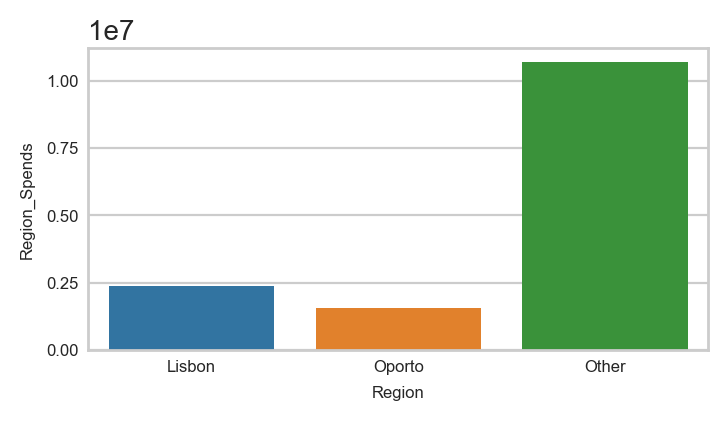

In [64]:
plt.figure(figsize = (4,2),dpi = 200)

sns.barplot(x = 'Region', y = 'Total', data = df_region_spends)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.xlabel('Region',fontsize = 6)
plt.ylabel('Region_Spends',fontsize = 6)
plt.savefig('region_count.png')
plt.show()

# Region - OTHER spends the most Region - OPORTO spends the least

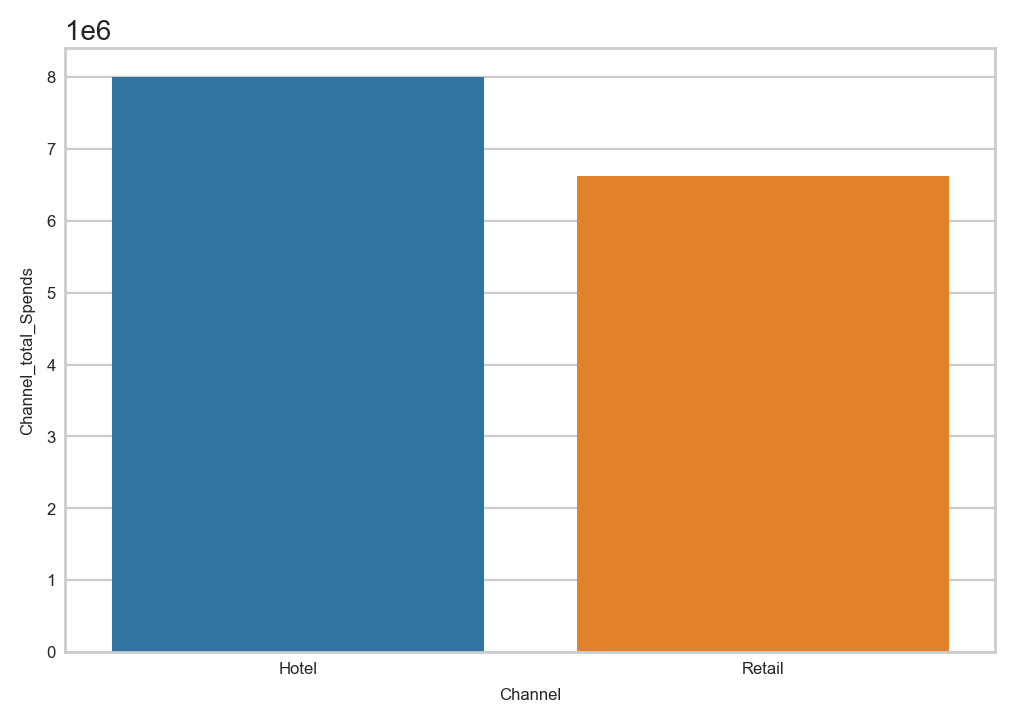

In [65]:
plt.figure(figsize = (6,4),dpi = 200)
sns.barplot(x = 'Channel', y= 'Total', data = df_channel_spends)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.xlabel('Channel',fontsize = 6)
plt.ylabel('Channel_total_Spends',fontsize = 6)
plt.savefig('Channel_count.png')
plt.show() 
# Channel - HOTEL spends the most. Channel - RETAIL spends the least

## 1.2

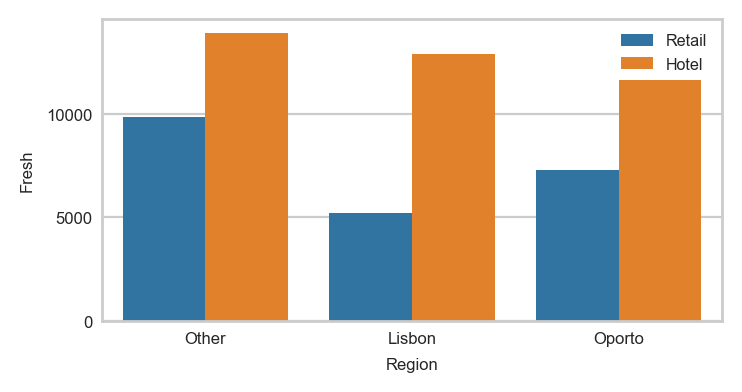

In [66]:
plt.figure(figsize = (4,2),dpi = 200)
sns.barplot(x= 'Region', y = 'Fresh', hue = 'Channel', data = df, ci = False)
plt.legend(fontsize = 'xx-small')
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.xlabel('Region',fontsize = 6)
plt.ylabel('Fresh',fontsize = 6)
plt.savefig('Region_Channel_Fresh.png')
plt.show()

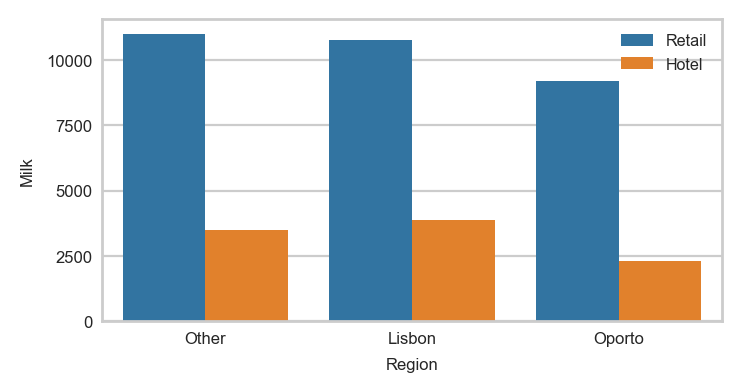

In [67]:
plt.figure(figsize = (4,2),dpi = 200)
sns.barplot(x= 'Region', y = 'Milk', hue = 'Channel', data = df, ci = False)
plt.legend(fontsize = 'xx-small')
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.xlabel('Region',fontsize = 6)
plt.ylabel('Milk',fontsize = 6)
plt.savefig('Region_Channel_Milk.png')
plt.show()

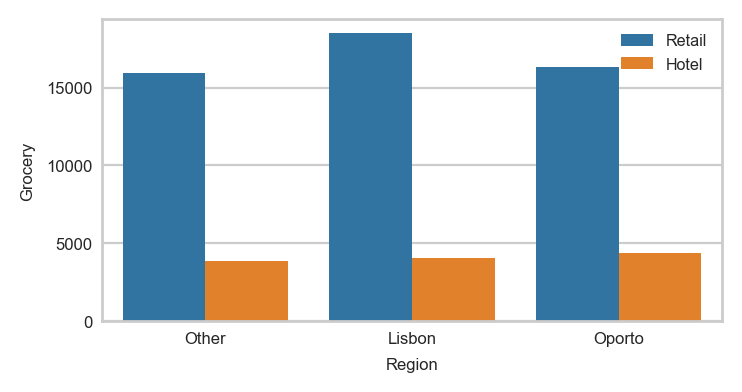

In [68]:
plt.figure(figsize = (4,2),dpi = 200)
sns.barplot(x= 'Region', y = 'Grocery', hue = 'Channel', data = df, ci = False)
plt.legend(fontsize = 'xx-small')
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.xlabel('Region',fontsize = 6)
plt.ylabel('Grocery',fontsize = 6)
plt.savefig('Region_Channel_Grocery.png')
plt.show()

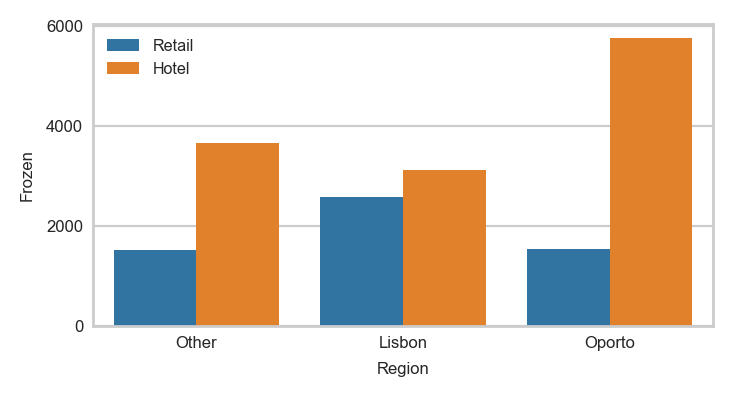

In [69]:
plt.figure(figsize = (4,2),dpi = 200)
sns.barplot(x= 'Region', y = 'Frozen', hue = 'Channel', data = df, ci = False)
plt.legend(fontsize = 'xx-small')
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.xlabel('Region',fontsize = 6)
plt.ylabel('Frozen',fontsize = 6)
plt.savefig('Region_Channel_Frozen.png')
plt.show()

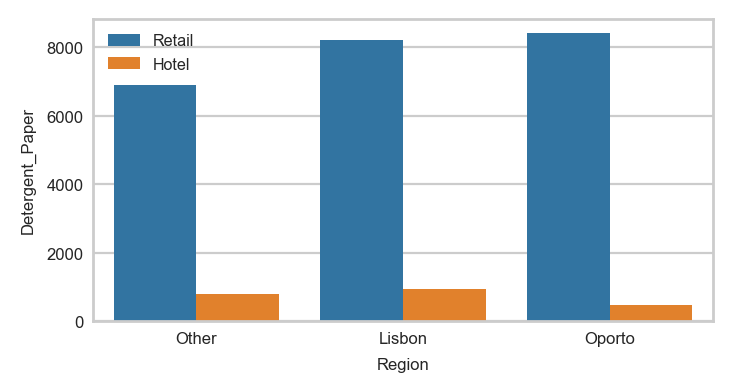

In [70]:
plt.figure(figsize = (4,2),dpi = 200)
sns.barplot(x= 'Region', y = 'Detergents_Paper', hue = 'Channel', data = df, ci = False)
plt.legend(fontsize='xx-small')
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.xlabel('Region',fontsize = 6)
plt.ylabel('Detergent_Paper',fontsize = 6)
plt.savefig('Region_Channel_Detergent_Paper.png')
plt.show()

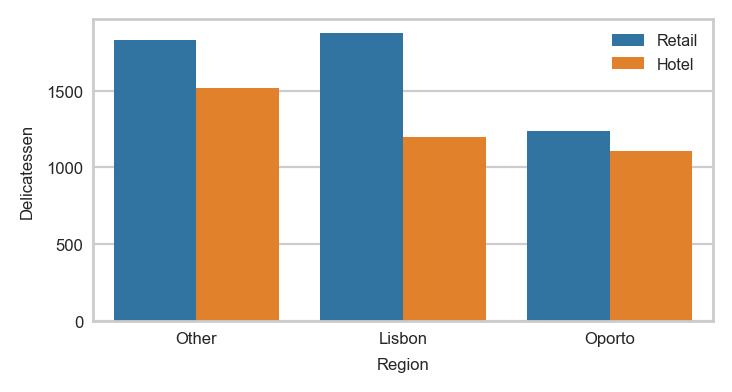

In [71]:
plt.figure(figsize = (4,2),dpi = 200)
sns.barplot(x= 'Region', y = 'Delicatessen', hue = 'Channel', data = df, ci = False)
plt.legend(fontsize = 'xx-small')
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.xlabel('Region',fontsize = 6)
plt.ylabel('Delicatessen',fontsize = 6)
plt.savefig('Region_Channel_Delicatessen.png')
plt.show()

In [72]:
Lisbon_Des = df[df['Region'] == 'Lisbon'].describe()
Lisbon_Des

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,235.000000,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104
std,22.371857,11557.438575,5704.856079,8496.287728,3092.143894,4208.462708,1345.423340
min,197.000000,18.000000,258.000000,489.000000,61.000000,5.000000,7.000000
25%,216.000000,2806.000000,1372.000000,2046.000000,950.000000,284.000000,548.000000
50%,235.000000,7363.000000,3748.000000,3838.000000,1801.000000,737.000000,806.000000
75%,254.000000,15218.000000,7503.000000,9490.000000,4324.000000,3593.000000,1775.000000
max,273.000000,56083.000000,28326.000000,39694.000000,18711.000000,19410.000000,6854.000000


In [73]:
dfi.export(Lisbon_Des,'Lisbon_Des.png')

In [74]:
Oporto_des = df[df['Region']== 'Oporto'].describe()
Oporto_des

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,317.000000,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128
std,13.711309,8387.899211,5826.343145,10842.745314,9151.784954,6514.717668,1050.739841
min,294.000000,3.000000,333.000000,1330.000000,131.000000,15.000000,51.000000
25%,305.500000,2751.500000,1430.500000,2792.500000,811.500000,282.500000,540.500000
50%,317.000000,8090.000000,2374.000000,6114.000000,1455.000000,811.000000,898.000000
75%,328.500000,14925.500000,5772.500000,11758.500000,3272.000000,4324.500000,1538.500000
max,340.000000,32717.000000,25071.000000,67298.000000,60869.000000,38102.000000,5609.000000


In [75]:
dfi.export(Oporto_des,'Oporto_des.png')

In [76]:
Other_des = df[df['Region'] == 'Other'].describe()
Other_des

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,202.613924,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266
std,143.615303,13389.213115,7935.463443,9537.287778,4260.126243,4593.051613,3232.581660
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,79.750000,3350.750000,1634.000000,2141.500000,664.750000,251.250000,402.000000
50%,158.500000,8752.500000,3684.500000,4732.000000,1498.000000,856.000000,994.000000
75%,361.250000,17406.500000,7198.750000,10559.750000,3354.750000,3875.750000,1832.750000
max,440.000000,112151.000000,73498.000000,92780.000000,36534.000000,40827.000000,47943.000000


In [77]:
dfi.export(Other_des,'Other_des.png')

In [78]:
Hotel_Des = df[df['Channel'] == 'Hotel'].describe()
Hotel_Des

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,238.369128,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
std,120.910343,13831.687502,4352.165571,3545.513391,5643.912500,1104.093673,3147.426922
min,4.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,137.250000,4070.250000,1164.500000,1703.750000,830.000000,183.250000,379.000000
50%,241.500000,9581.500000,2157.000000,2684.000000,2057.500000,385.500000,821.000000
75%,344.500000,18274.750000,4029.500000,5076.750000,4558.750000,899.500000,1548.000000
max,440.000000,112151.000000,43950.000000,21042.000000,60869.000000,6907.000000,47943.000000


In [79]:
dfi.export(Hotel_Des,'Hotel_Des.png')

In [80]:
Retail_Des = df[df['Channel'] == 'Retail'].describe()
Retail_Des

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,183.000000,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620
std,132.136132,8987.714750,9679.631351,12267.318094,1812.803662,6291.089697,1953.797047
min,1.000000,18.000000,928.000000,2743.000000,33.000000,332.000000,3.000000
25%,61.250000,2347.750000,5938.000000,9245.250000,534.250000,3683.500000,566.750000
50%,166.500000,5993.500000,7812.000000,12390.000000,1081.000000,5614.500000,1350.000000
75%,303.750000,12229.750000,12162.750000,20183.500000,2146.750000,8662.500000,2156.000000
max,438.000000,44466.000000,73498.000000,92780.000000,11559.000000,40827.000000,16523.000000


In [81]:
dfi.export(Retail_Des,'Retail_Des.png')

## 1.3

In [82]:
fresh_std = df['Fresh'].std()
print('Standard Deviation of item Fresh =',fresh_std)
grocery_std = df['Grocery'].std()
print('Standard Deviation of item Grocery =',grocery_std)
milk_std = df['Milk'].std()
print('Standard Deviation of item Milk =',milk_std)
frozen_std = df['Frozen'].std()
print('Standard Deviation of item Frozen =',frozen_std)
detergents_std = df['Detergents_Paper'].std()
print('Standard Deviation of item Detergent_Paper =',detergents_std)
delicatessen_std = df['Delicatessen'].std()
print('Standard Deviation of item Delicatessen =',delicatessen_std)

Standard Deviation of item Fresh = 12647.328865076894
Standard Deviation of item Grocery = 9503.162828994346
Standard Deviation of item Milk = 7380.377174570843
Standard Deviation of item Frozen = 4854.673332592367
Standard Deviation of item Detergent_Paper = 4767.8544479042
Standard Deviation of item Delicatessen = 2820.1059373693975


In [83]:
fresh_COV = fresh_std/df['Fresh'].mean()
grocery_COV = grocery_std/df['Grocery'].mean()
milk_COV = milk_std/df['Milk'].mean()
frozen_COV = frozen_std/df['Frozen'].mean()
detergents_COV = detergents_std/df['Detergents_Paper'].mean()
delicatessen_COV = delicatessen_std/df['Delicatessen'].mean()

In [84]:
print('Coefficient of Variation of FRESH =', fresh_COV)
print('Coefficient of Variation of GROCERY =', grocery_COV)
print('Coefficient of Variation of MILK =', milk_COV)
print('Coefficient of Variation of FROZEN =', frozen_COV)
print('Coefficient of Variation of DETERGENTS_PAPER =', detergents_COV)
print('Coefficient of Variation of DELICATESSEN =', delicatessen_COV)



Coefficient of Variation of FRESH = 1.0539179237473149
Coefficient of Variation of GROCERY = 1.1951743730016824
Coefficient of Variation of MILK = 1.2732985840065414
Coefficient of Variation of FROZEN = 1.5803323836352914
Coefficient of Variation of DETERGENTS_PAPER = 1.6546471385005155
Coefficient of Variation of DELICATESSEN = 1.8494068981158382


## 1.4

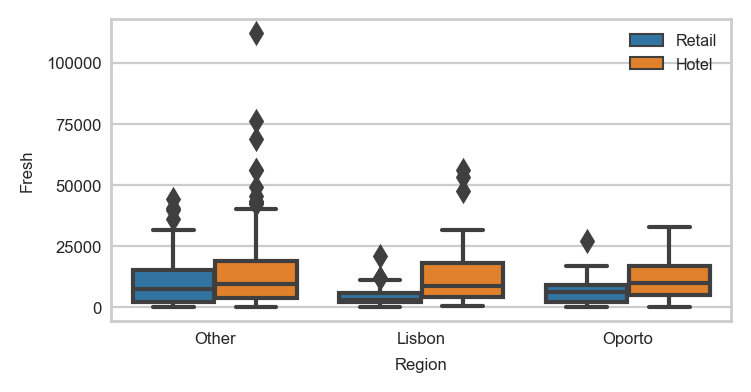

In [85]:
plt.figure(figsize=(4,2),dpi = 200)
sns.boxplot(x = 'Region', y = 'Fresh', hue = 'Channel', data = df)
plt.legend(fontsize = 'xx-small')
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.xlabel('Region',fontsize = 6)
plt.ylabel('Fresh',fontsize = 6)
plt.savefig('Fresh_Outliers.png')
plt.show()

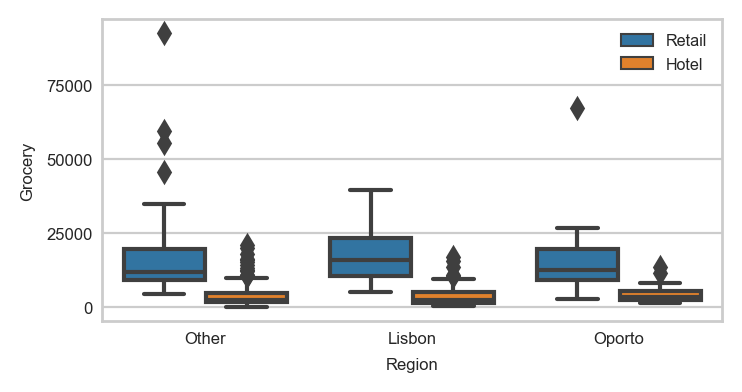

In [86]:
plt.figure(figsize=(4,2),dpi = 200)
sns.boxplot(x = 'Region', y = 'Grocery', hue = 'Channel', data = df)
plt.legend(fontsize = 'xx-small')
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.xlabel('Region',fontsize = 6)
plt.ylabel('Grocery',fontsize = 6)
plt.savefig('Grocery_Outliers.png')
plt.show()

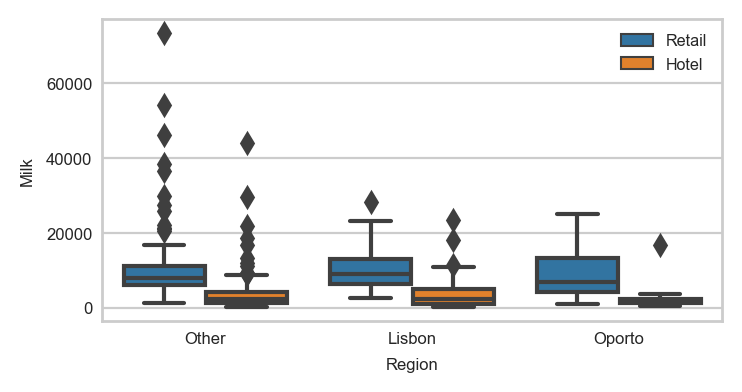

In [87]:
plt.figure(figsize=(4,2),dpi = 200)
sns.boxplot(x = 'Region', y = 'Milk', hue = 'Channel', data = df)
plt.legend(fontsize = 'xx-small')
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.xlabel('Region',fontsize = 6)
plt.ylabel('Milk',fontsize = 6)
plt.savefig('Milk_Outliers.png')
plt.show()

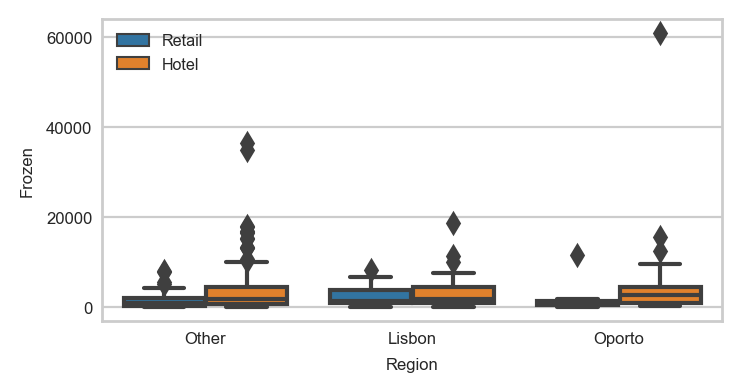

In [88]:
plt.figure(figsize=(4,2),dpi = 200)
sns.boxplot(x = 'Region', y = 'Frozen', hue = 'Channel', data = df)
plt.legend(fontsize = 'xx-small')
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.xlabel('Region',fontsize = 6)
plt.ylabel('Frozen',fontsize = 6)
plt.savefig('Frozen_Outliers.png')
plt.show()

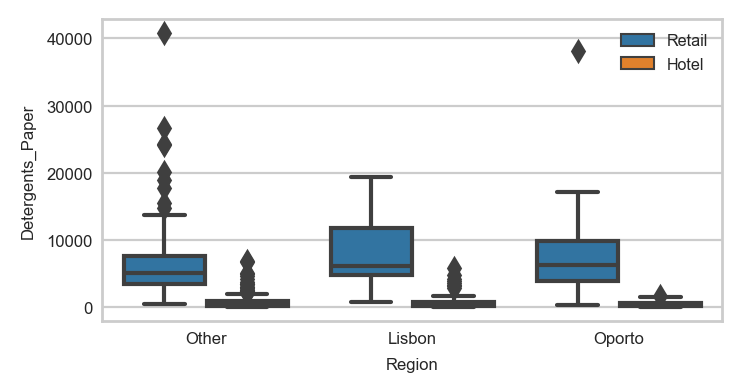

In [89]:
plt.figure(figsize=(4,2), dpi = 200)
sns.boxplot(x = 'Region', y = 'Detergents_Paper', hue = 'Channel', data = df)
plt.legend(fontsize = 'xx-small')
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.xlabel('Region',fontsize = 6)
plt.ylabel('Detergents_Paper',fontsize = 6)
plt.savefig('Detergents_Paper_Outliers.png')
plt.show()

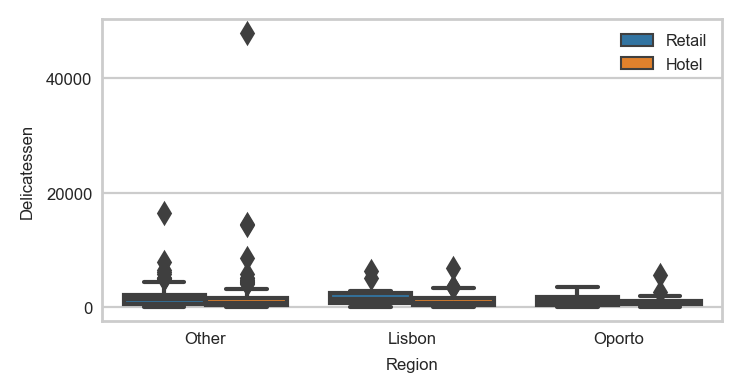

In [90]:
plt.figure(figsize=(4,2),dpi = 200)
sns.boxplot(x = 'Region', y = 'Delicatessen', hue = 'Channel', data = df)
plt.legend(fontsize = 'xx-small')
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.xlabel('Region',fontsize = 6)
plt.ylabel('Delicatessen',fontsize = 6)
plt.savefig('Delicatessen_Outliers.png')
plt.show()

In [91]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


## 1.4

In [92]:
df_products = df[df.columns[3:df.columns.size]]
df_products

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


No handles with labels found to put in legend.


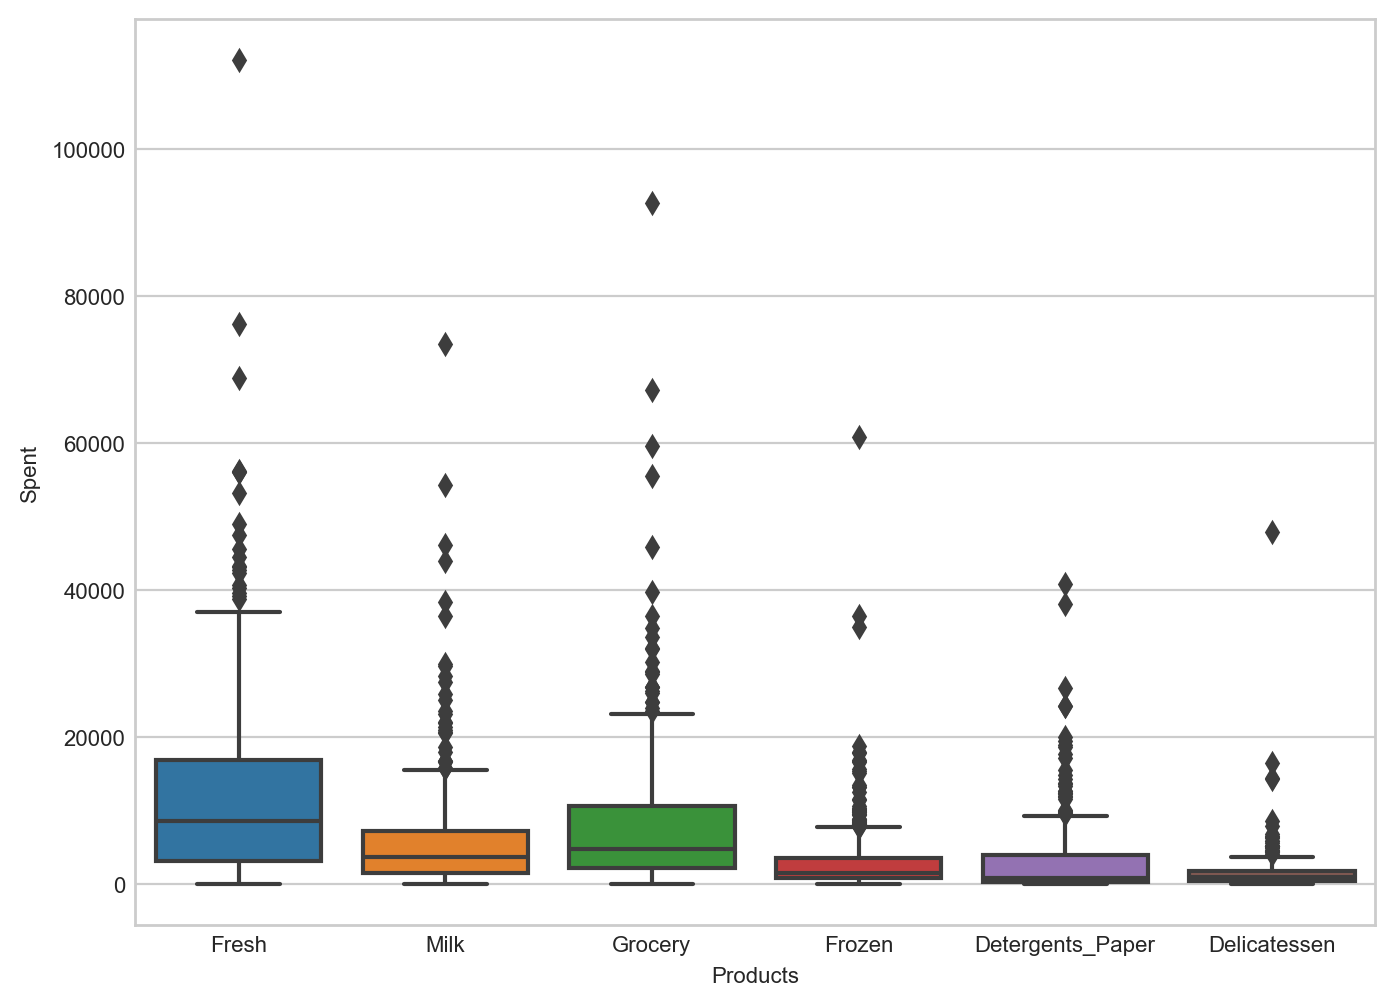

In [93]:
plt.figure(figsize=(8,6),dpi = 200)
sns.boxplot(data= df_products)
plt.legend(fontsize = 'x-small')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel('Products',fontsize = 8)
plt.ylabel('Spent',fontsize = 8)
plt.savefig('Products_Outliers.png')
plt.show()

## 1.5

In [94]:
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [95]:
df_drop = df.drop(['Buyer/Spender','Channel','Region'], axis=1)
df_drop

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [96]:
corr = df_drop.corr()

In [97]:
corr

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


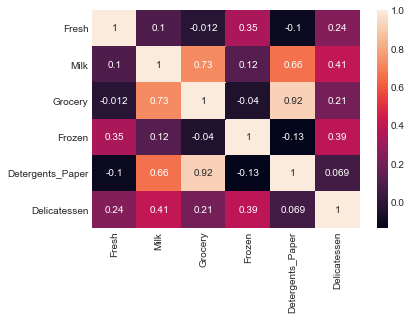

In [98]:
sns.heatmap(corr,annot= True)
plt.savefig('Heatmap.png')
plt.show()

In [99]:
cross_tab = pd.crosstab(df['Region'],df['Channel'],margins = True)
plt.savefig('cross_tab.png')

<Figure size 432x288 with 0 Axes>

In [100]:
pip install dataframe-image

Note: you may need to restart the kernel to use updated packages.


In [101]:
dfi.export(cross_tab, 'dataframe.png')

# Problem 2 - CMSU
The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).



In [102]:
cmsu = pd.read_csv('/Users/siddhantraj/Desktop/Business Analytics/Statistics for Data Science/Final Project/Survey-1.csv')

In [103]:
cmsu.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [104]:
cmsu.tail()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50
61,62,Female,23,Senior,Economics/Finance,No,3.2,Part-Time,70.0,2,3,250,Laptop,0


In [105]:
cmsu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [106]:
cmsu.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62.0,NaN,NaN,NaN,31.5,18.041619,1.0,16.25,31.5,46.75,62.0
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62.0,NaN,NaN,NaN,21.129032,1.431311,18.0,20.0,21.0,22.0,26.0
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62.0,NaN,NaN,NaN,3.129032,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62.0,NaN,NaN,NaN,48.548387,12.080912,25.0,40.0,50.0,55.0,80.0
Social Networking,62.0,NaN,NaN,NaN,1.516129,0.844305,0.0,1.0,1.0,2.0,4.0


## 2.1.1

In [107]:
gender_major = pd.crosstab(cmsu['Gender'],cmsu['Major'],margins = True)
dfi.export(gender_major,'gender_major.png')

In [108]:
gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [109]:
gender_gradintention = pd.crosstab(cmsu['Gender'],cmsu['Grad Intention'],margins = True)
dfi.export(gender_gradintention,'gender_gradintention.png')

In [110]:
gender_gradintention

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [111]:
gender_employment = pd.crosstab(cmsu['Gender'],cmsu['Employment'],margins = True)
dfi.export(gender_employment, 'gender_employment.png')

In [112]:
gender_employment

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [113]:
gender_computer = pd.crosstab(cmsu['Gender'], cmsu['Computer'], margins= True)
dfi.export(gender_computer,'gender_computer.png')

In [114]:
gender_computer

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


## 2.6

In [115]:
gender_gradintention_YN = pd.crosstab(cmsu['Gender'],cmsu['Grad Intention'])
gender_gradintention_YN.drop('Undecided',axis=1,inplace=True)
gender_gradintention_YN

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [116]:
gender_gradintention_YN['Total'] = gender_gradintention_YN.sum(axis = 1)

In [117]:
gender_gradintention_YN

Grad Intention,No,Yes,Total
Gender,,,
Female,9,11,20
Male,3,17,20


In [118]:
gender_gradintention_YN.loc['Total'] = gender_gradintention_YN.sum(axis=0,numeric_only=True)

In [119]:
gender_gradintention_YN

Grad Intention,No,Yes,Total
Gender,,,
Female,9,11,20
Male,3,17,20
Total,12,28,40


In [120]:
dfi.export(gender_gradintention_YN,'gender_gradintention_YN.png')

## 2.7

In [121]:
import scipy.stats as stats

In [122]:
cmsu[cmsu['GPA'] < 3].shape

(17, 14)

In [123]:
cmsu[(cmsu['Gender']=='Male') & (cmsu['Salary'] >= 50)].shape

(14, 14)

In [124]:
cmsu[cmsu['Gender']=='Male'].shape

(29, 14)

In [125]:
gender_Salary_50 = pd.crosstab(cmsu['Gender'],cmsu['Salary']>=50)

In [126]:
dfi.export(gender_Salary_50,'gender_salary_50.png')

## 2.8

In [127]:
cmsu.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


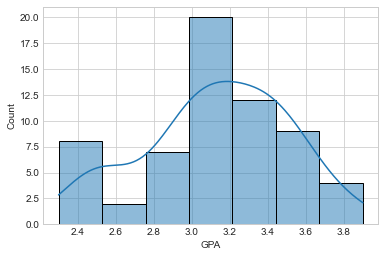

In [128]:
sns.histplot(cmsu['GPA'], kde = True)
plt.savefig('GPA_KDE.png')
plt.show()

In [129]:
print(cmsu['GPA'].describe())
print('Mode:',cmsu['GPA'].mode())
print('Skewness:',cmsu['GPA'].skew())

count    62.000000
mean      3.129032
std       0.377388
min       2.300000
25%       2.900000
50%       3.150000
75%       3.400000
max       3.900000
Name: GPA, dtype: float64
Mode: 0    3.0
1    3.1
2    3.4
dtype: float64
Skewness: -0.3146000894506981


In [130]:
mean_gp = cmsu['GPA'].mean()
sd_gp = cmsu['GPA'].std()
pd.Series(((cmsu['GPA'] >(mean_gp-sd_gp)) & (cmsu['GPA'] <(mean_gp+sd_gp))).value_counts(normalize=True))

True     0.725806
False    0.274194
Name: GPA, dtype: float64

In [131]:
pd.Series(((cmsu['GPA'] >(mean_gp-2*sd_gp)) & (cmsu['GPA'] <(mean_gp+2*sd_gp))).value_counts(normalize=True))

True     0.967742
False    0.032258
Name: GPA, dtype: float64

In [132]:
pd.Series(((cmsu['GPA'] >(mean_gp-3*sd_gp)) & (cmsu['GPA'] <(mean_gp+3*sd_gp))).value_counts(normalize=True))

True    1.0
Name: GPA, dtype: float64

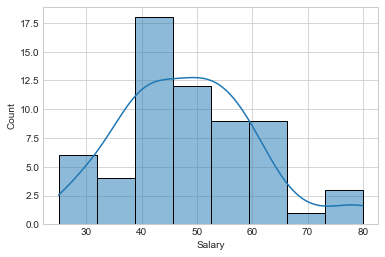

In [133]:
sns.histplot(cmsu['Salary'],kde = True)
plt.savefig('Salary.png')
plt.show()

In [134]:
print(cmsu['Salary'].describe())
print('Mode',cmsu['Salary'].mode())
print('Skewness',cmsu['Salary'].skew())

count    62.000000
mean     48.548387
std      12.080912
min      25.000000
25%      40.000000
50%      50.000000
75%      55.000000
max      80.000000
Name: Salary, dtype: float64
Mode 0    40.0
dtype: float64
Skewness 0.5347008436225946


In [135]:
mean_sa = cmsu['Salary'].mean()
sd_sa = cmsu['Salary'].std()
pd.Series(((cmsu['Salary'] >(mean_sa-sd_sa)) & (cmsu['Salary'] <(mean_sa+sd_sa))).value_counts(normalize=True))

True     0.790323
False    0.209677
Name: Salary, dtype: float64

In [136]:
pd.Series(((cmsu['Salary'] >(mean_sa-2*sd_sa)) & (cmsu['Salary'] <(mean_sa+2*sd_sa))).value_counts(normalize=True))

True     0.951613
False    0.048387
Name: Salary, dtype: float64

In [137]:
pd.Series(((cmsu['Salary'] >(mean_sa-3*sd_sa)) & (cmsu['Salary'] <(mean_sa+3*sd_sa))).value_counts(normalize=True))

True    1.0
Name: Salary, dtype: float64

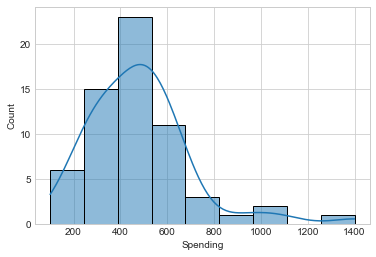

In [138]:
sns.histplot(cmsu['Spending'],kde = True)
plt.savefig('Spending.png')
plt.show()

In [139]:
print(cmsu['Spending'].describe())
print('Mode:',cmsu['Spending'].mode())
print('Skewness:',cmsu['Spending'].skew())

count      62.000000
mean      482.016129
std       221.953805
min       100.000000
25%       312.500000
50%       500.000000
75%       600.000000
max      1400.000000
Name: Spending, dtype: float64
Mode: 0    500
dtype: int64
Skewness: 1.5859147414045331


In [140]:
mean_spe=cmsu['Spending'].mean()
sd_spe = cmsu['Spending'].std()
pd.Series(((cmsu['Spending'] >(mean_spe-sd_spe)) & (cmsu['Spending'] <(mean_spe+sd_spe))).value_counts(normalize=True))

True     0.806452
False    0.193548
Name: Spending, dtype: float64

In [141]:
pd.Series(((cmsu['Spending'] >(mean_spe-2*sd_spe)) & (cmsu['Spending'] <(mean_spe+2*sd_spe))).value_counts(normalize=True))

True     0.951613
False    0.048387
Name: Spending, dtype: float64

In [142]:
pd.Series(((cmsu['Spending'] >(mean_spe-3*sd_spe)) & (cmsu['Spending'] <(mean_spe+3*sd_spe))).value_counts(normalize=True))

True     0.983871
False    0.016129
Name: Spending, dtype: float64

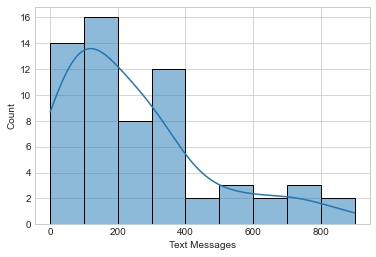

In [143]:
sns.histplot(cmsu['Text Messages'], kde = True)
plt.savefig('Text.png')
plt.show()

In [144]:
print(cmsu['Text Messages'].describe())
print('Mode:',cmsu['Text Messages'].mode())
print('Skew:',cmsu['Text Messages'].skew())


count     62.000000
mean     246.209677
std      214.465950
min        0.000000
25%      100.000000
50%      200.000000
75%      300.000000
max      900.000000
Name: Text Messages, dtype: float64
Mode: 0    300
dtype: int64
Skew: 1.2958079731054333


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Text Messages', ylabel='Density'>

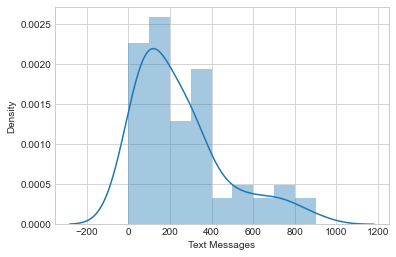

In [145]:
sns.distplot(cmsu['Text Messages'])

In [146]:
mean=cmsu['Text Messages'].mean()
sd = cmsu['Text Messages'].std()
pd.Series(((cmsu['Text Messages'] >(mean-sd)) & (cmsu['Text Messages'] <(mean+sd))).value_counts(normalize=True))

True     0.790323
False    0.209677
Name: Text Messages, dtype: float64

In [147]:
pd.Series(((cmsu['Text Messages'] >(mean-2*sd)) & (cmsu['Text Messages'] <(mean+2*sd))).value_counts(normalize=True))

True     0.919355
False    0.080645
Name: Text Messages, dtype: float64

In [148]:
pd.Series(((cmsu['Text Messages'] >(mean-3*sd)) & (cmsu['Text Messages'] <(mean+3*sd))).value_counts(normalize=True))

True     0.983871
False    0.016129
Name: Text Messages, dtype: float64

# Problem 3 - Shingles A and B
An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [149]:
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
import scipy.stats as stats
import statsmodels.stats.api as sm

In [150]:
shingles = pd.read_csv('/Users/siddhantraj/Desktop/Business Analytics/Statistics for Data Science/Final Project/A+&+B+shingles.csv')

In [205]:
len(shingles['B'].dropna())

31

In [151]:
shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [163]:
shingles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [164]:
null_value_table = shingles.isnull().sum()
null_value_table

A    0
B    5
dtype: int64

## 3.1

### Shingle A

#### Null and Alternate Hypothesis
- 𝐻𝑜 : $\mu <= 0.35$
- $H_a$: $\mu > 0.35$

#### Level of Significance
- As the level of significance is not mentioned we can assume as follows:
    - $\alpha$ = 0.05

In [167]:
level_of_significance = 0.05

#### Test 
- since we need to examine whether the mean of a population is statistically different from a known or hypothesized value, we will be using One Sample T- Test
- We will be using One Tailed Test for Upper Tail

In [220]:
t_statistic, p_value = stats.ttest_1samp(shingles['A'], 0.35)

In [221]:
print('Test Statistic: ',t_statistic)

Test Statistic:  -1.4735046253382782


In [222]:
print('p_value: ',p_value/2)

p_value:  0.07477633144907513


In [223]:
if p_value < level_of_significance:
    print(f'Since p-value is {p_value} which is less than the level of significance, We can Reject the Null Hypothesis')
else:
    print(f'Since p-value is {p_value} which is greater than the level of significance, We Fail to Reject the Null Hypothesis')

Since p-value is 0.14955266289815025 which is greater than the level of significance, We Fail to Reject the Null Hypothesis


### Shingle B

#### Null and Alternate Hypothesis
- 𝐻𝑜 : $\mu <= 0.35$
- $H_a$: $\mu > 0.35$

#### Level of Significance
- As the level of significance is not mentioned we can assume as follows:
    - $\alpha$ = 0.05

#### Test 
- since we need to examine whether the mean of a population is statistically different from a known or hypothesized value, we will be using One Sample T- Test
- We will be using One Tailed Test for Upper Tail

#### From the null_value_table we can see that Column B in the shingles table has null values

In [216]:
t_statistic, p_value = stats.ttest_1samp(shingles['B'].dropna(),0.35)

In [217]:
print('Test Statistic: ',t_statistic)

Test Statistic:  -3.1003313069986995


In [218]:
print('p_value: ',p_value/2)

p_value:  0.0020904774003191813


In [219]:
if p_value < level_of_significance:
    print(f'Since p-value is {p_value} which is less than the level of significance, We can Reject the Null Hypothesis')
else:
    print(f'Since p-value is {p_value} which is greater than the level of significance, We Fail to Reject the Null Hypothesis')

Since p-value is 0.004180954800638363 which is less than the level of significance, We can Reject the Null Hypothesis


## 3.2

#### Null and Alternate Hypothesis
 * Null Hypothesis : $H_o$ : $\mu_a = \mu_b$

 * Alternate Hypothesis : $H_a$ : $\mu_a \neq \mu_b$  [Two tailed]

#### Level of Significance
- As the level of significance is not mentioned we can assume as follows:
    - $\alpha$ = 0.05

In [224]:
t_statistic, p_value = ttest_ind(shingles['A'],shingles['B'], axis=0, equal_var=True, nan_policy='omit')
print('t stat =',t_statistic)
print('p value =',p_value)

t stat = 1.2896282719661123
p value = 0.2017496571835306


In [226]:
print('level of significance:',level_of_significance)

level of significance: 0.05


In [227]:
if p_value < level_of_significance:
    print('We have enough evidence to reject the Null Hypothesis')
    print('We can conclude that mean Moisture Content in the two sample are not same')
else:
    print('We do not have enough evidence to reject the Null Hypothesis')
    print('We can conclude that the mean Moisture Content in the two sample are same ')

We do not have enough evidence to reject the Null Hypothesis
We can conclude that the mean Moisture Content in the two sample are same 
